In [20]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [21]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
#unzip the dataset
!unzip "/content/gdrive/My Drive/CNN_assignment.zip" > /dev/null

replace Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [22]:
data_dir_train = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

In [23]:
#Train Image count
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

#Test Image count
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [24]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [25]:
batch_size = 32
img_height = 180
img_width = 180

In [26]:
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir_train,
                                                       validation_split=0.2,
                                                       subset="training",seed=356,
                                                       image_size=(img_height,img_width),
                                                       batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [27]:
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir_test,
                                                       validation_split=0.2,
                                                       subset="validation",seed=356,
                                                       image_size=(img_height,img_width),
                                                       batch_size=batch_size)

Found 118 files belonging to 9 classes.
Using 23 files for validation.


In [28]:
class_names = train_ds.class_names
class_number = len(class_names)
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [29]:
from glob import glob

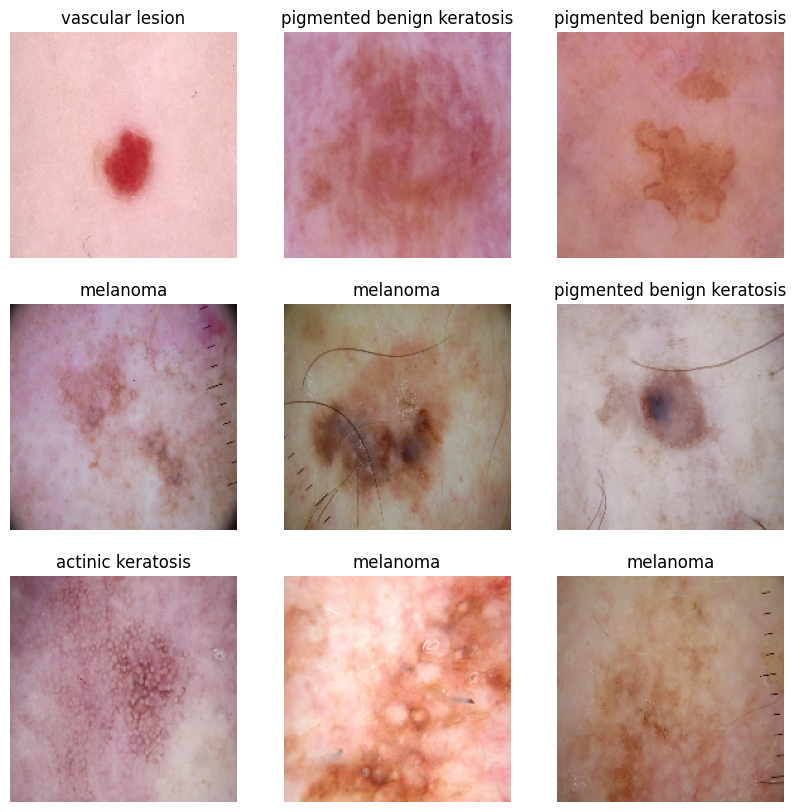

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(class_number):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026212.jpg', '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0030826.jpg', '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026626.jpg', '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0027950.jpg', '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025992.jpg', '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0028941.jpg', '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026625.jpg', '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0030491.jpg', '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/a

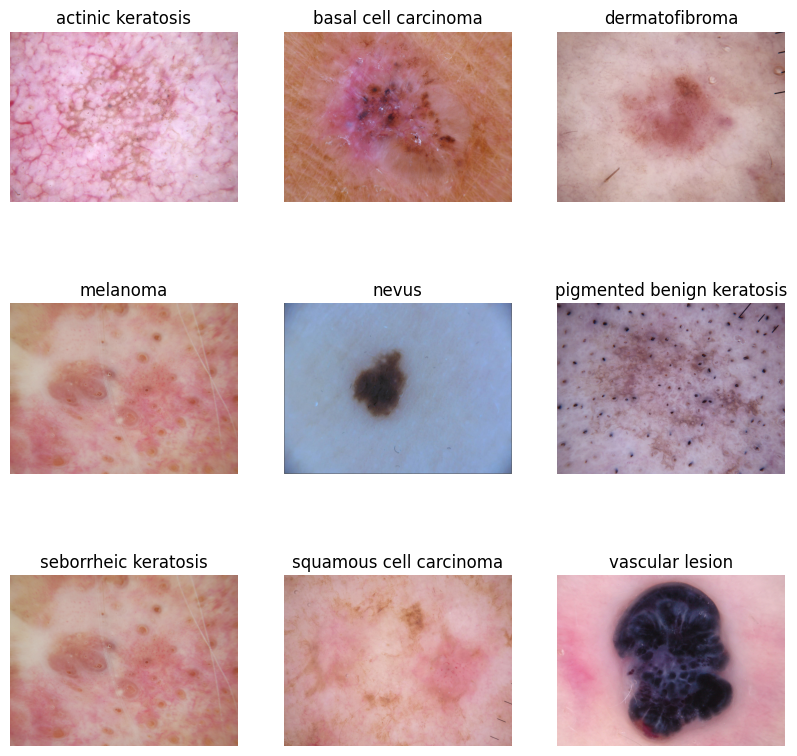

In [ ]:
plt.figure(figsize=(10,10))

for image_type in range(class_number):
  class_path = glob(os.path.join(data_dir_train,class_names[image_type],'*'))
  print(class_path)
  imgs = list(class_path)
  img = PIL.Image.open(str(imgs[0]))
  ax = plt.subplot(3,3,image_type+1)
  plt.imshow(img)
  plt.title(class_names[image_type])
  plt.axis("off")



In [14]:
model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(class_number, activation='softmax')
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 32)        9

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 105s 2s/step - loss: 1.8228 - accuracy: 0.3276 - val_loss: 1.5699 - val_accuracy: 0.4783
Epoch 2/20
56/56 [==============================] - 103s 2s/step - loss: 1.5674 - accuracy: 0.4448 - val_loss: 1.7183 - val_accuracy: 0.3913
Epoch 3/20
56/56 [==============================] - 100s 2s/step - loss: 1.4987 - accuracy: 0.4637 - val_loss: 1.6537 - val_accuracy: 0.4348
Epoch 4/20
56/56 [==============================] - 101s 2s/step - loss: 1.3517 - accuracy: 0.5223 - val_loss: 1.7124 - val_accuracy: 0.4783
Epoch 5/20
56/56 [==============================] - 98s 2s/step - loss: 1.3339 - accuracy: 0.5162 - val_loss: 2.2036 - val_accuracy: 0.5652
Epoch 6/20
56/56 [==============================] - 103s 2s/step - loss: 1.2286 - accuracy: 0.5558 - val_loss: 1.6877 - val_accuracy: 0.6522
Epoch 7/20
56/56 [==============================] - 98s 2s/step - loss: 1.1936 - accuracy: 0.5765 - val_loss: 1.3853 - val_accuracy: 0.6087
Epoch 8/20
56/56 [========

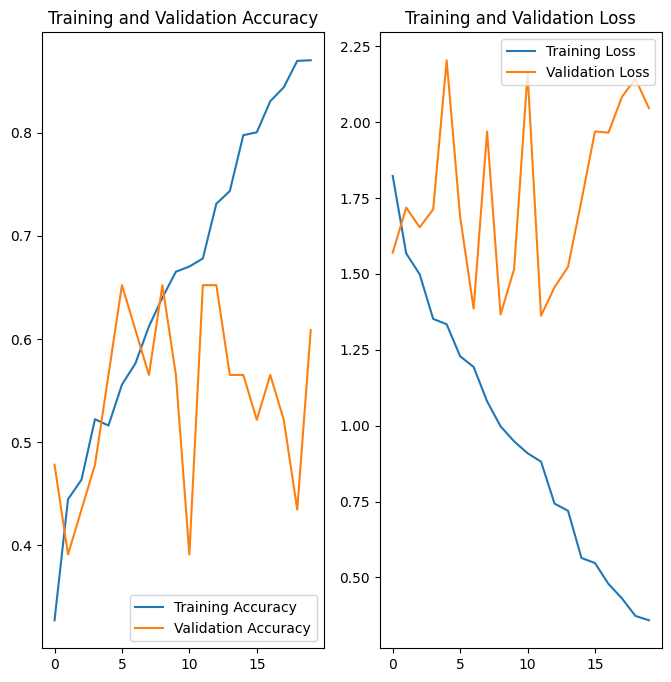

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
model2 = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(class_number, activation='softmax')
])

In [31]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [37]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 178, 178, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 batch_normalization_5 (Batc  (None, 87, 87, 32)      

In [33]:
epochs = 20
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 136s 2s/step - loss: 1.8265 - accuracy: 0.4258 - val_loss: 3.4301 - val_accuracy: 0.1739
Epoch 2/20
56/56 [==============================] - 133s 2s/step - loss: 1.2721 - accuracy: 0.5647 - val_loss: 3.8220 - val_accuracy: 0.1739
Epoch 3/20
56/56 [==============================] - 131s 2s/step - loss: 1.0727 - accuracy: 0.6189 - val_loss: 4.0402 - val_accuracy: 0.1739
Epoch 4/20
56/56 [==============================] - 133s 2s/step - loss: 0.9311 - accuracy: 0.6802 - val_loss: 4.3841 - val_accuracy: 0.1739
Epoch 5/20
56/56 [==============================] - 129s 2s/step - loss: 0.7596 - accuracy: 0.7282 - val_loss: 3.7626 - val_accuracy: 0.1739
Epoch 6/20
56/56 [==============================] - 132s 2s/step - loss: 0.5633 - accuracy: 0.8080 - val_loss: 3.5167 - val_accuracy: 0.2609
Epoch 7/20
56/56 [==============================] - 132s 2s/step - loss: 0.4466 - accuracy: 0.8482 - val_loss: 1.8110 - val_accuracy: 0.4348
Epoch 8/20
56/56 [======

In [34]:
model3 = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(class_number, activation='softmax')
])

In [35]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 batch_normalization_8 (Batc  (None, 178, 178, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 87, 87, 32)        9248      
                                                                 
 batch_normalization_9 (Batc  (None, 87, 87, 32)      

In [39]:
epochs = 20
history = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 136s 2s/step - loss: 1.8370 - accuracy: 0.4347 - val_loss: 3.3444 - val_accuracy: 0.1739
Epoch 2/20
56/56 [==============================] - 131s 2s/step - loss: 1.2657 - accuracy: 0.5737 - val_loss: 3.7603 - val_accuracy: 0.1739
Epoch 3/20
56/56 [==============================] - 130s 2s/step - loss: 1.0366 - accuracy: 0.6434 - val_loss: 3.6321 - val_accuracy: 0.1739
Epoch 4/20
56/56 [==============================] - 128s 2s/step - loss: 0.8619 - accuracy: 0.7065 - val_loss: 3.3685 - val_accuracy: 0.2174
Epoch 5/20
56/56 [==============================] - 131s 2s/step - loss: 0.6768 - accuracy: 0.7723 - val_loss: 3.0393 - val_accuracy: 0.2609
Epoch 6/20
56/56 [==============================] - 129s 2s/step - loss: 0.5175 - accuracy: 0.8220 - val_loss: 2.6823 - val_accuracy: 0.3478
Epoch 7/20
56/56 [==============================] - 131s 2s/step - loss: 0.4491 - accuracy: 0.8443 - val_loss: 2.7629 - val_accuracy: 0.3043
Epoch 8/20
56

In [40]:
model4 = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(class_number, activation='softmax')
])

In [44]:
model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [45]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 dropout (Dropout)           (None, 178, 178, 32)      0         
                                                                 
 batch_normalization_12 (Bat  (None, 178, 178, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 87, 87, 32)       

In [46]:
epochs = 20
history = model4.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)



Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 165s 3s/step - loss: 1.8152 - accuracy: 0.4224 - val_loss: 16.1754 - val_accuracy: 0.2174
Epoch 2/20
56/56 [==============================] - 164s 3s/step - loss: 1.3813 - accuracy: 0.5246 - val_loss: 29.7004 - val_accuracy: 0.2174
Epoch 3/20
56/56 [==============================] - 160s 3s/step - loss: 1.1970 - accuracy: 0.5915 - val_loss: 33.4205 - val_accuracy: 0.2174
Epoch 4/20
56/56 [==============================] - 164s 3s/step - loss: 1.0403 - accuracy: 0.6406 - val_loss: 27.3542 - val_accuracy: 0.2174
Epoch 5/20
56/56 [==============================] - 163s 3s/step - loss: 0.9677 - accuracy: 0.6562 - val_loss: 13.0281 - val_accuracy: 0.2174
Epoch 6/20
56/56 [==============================] - 162s 3s/step - loss: 0.8771 - accuracy: 0.6920 - val_loss: 3.5485 - val_accuracy: 0.3043
Epoch 7/20
56/56 [==============================] - 164s 3s/step - loss: 0.7340 - accuracy: 0.7427 - val_loss: 3.7661 - val_accuracy: 0.3478
Epoch 8/20
56/56 [=

In [47]:
!pip install Augmentor

In [48]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(data_dir_train) + '/' + str(i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DAE8759B0A0>: 100%|██████████| 500/500 [00:22<00:00, 22.38 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DAE85BFED70>: 100%|██████████| 500/500 [00:23<00:00, 21.19 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DAE87333C70>: 100%|██████████| 500/500 [00:22<00:00, 22.13 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DAE875D5F90>: 100%|██████████| 500/500 [02:18<00:00,  3.62 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1504x1129 at 0x7DAE888A3F40>: 100%|██████████| 500/500 [01:49<00:00,  4.57 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DAE87330490>: 100%|██████████| 500/500 [00:24<00:00, 20.07 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DAE888A3F40>: 100%|██████████| 500/500 [00:54<00:00,  9.14 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DAE85BFDED0>: 100%|██████████| 500/500 [00:23<00:00, 20.88 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DAE888B0160>: 100%|██████████| 500/500 [00:22<00:00, 22.13 Samples/s]


In [49]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [52]:

data_dir_train = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")

train_ds = tf.keras.utils.image_dataset_from_directory(data_dir_train,
                                                       validation_split=0.2,
                                                       subset="training",seed=356,
                                                       image_size=(img_height,img_width),
                                                       batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [59]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=356,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [56]:
num_classes = 9

model5 = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [57]:
model5.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [60]:
epochs = 20
history = model5.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 291s 2s/step - loss: 0.5916 - accuracy: 0.7882 - val_loss: 2.2250 - val_accuracy: 0.5217
Epoch 2/20
169/169 [==============================] - 300s 2s/step - loss: 0.4721 - accuracy: 0.8340 - val_loss: 3.0351 - val_accuracy: 0.5652
Epoch 3/20
169/169 [==============================] - 299s 2s/step - loss: 0.3853 - accuracy: 0.8641 - val_loss: 4.2710 - val_accuracy: 0.4783
Epoch 4/20
169/169 [==============================] - 294s 2s/step - loss: 0.3271 - accuracy: 0.8806 - val_loss: 3.2946 - val_accuracy: 0.5652
Epoch 5/20
169/169 [==============================] - 290s 2s/step - loss: 0.2726 - accuracy: 0.9032 - val_loss: 4.1967 - val_accuracy: 0.5652
Epoch 6/20
169/169 [==============================] - 292s 2s/step - loss: 0.2461 - accuracy: 0.9106 - val_loss: 4.2968 - val_accuracy: 0.5217
Epoch 7/20
143/169 [========================>.....] - ETA: 43s - loss: 0.1960 - accuracy: 0.9305

KeyboardInterrupt: ignored